Importing Libraries 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


Data Preprocessing

In [21]:
file_path = "../data/raw/parkinson_dataset.csv"
df = pd.read_csv(file_path,header=1)
df.drop(columns=['id'],inplace=True) 

df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [22]:
target='class'
X=df.drop(columns=[target], axis=1)
y=df[target]
X

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131


1- Dropping Duplicate Values

In [23]:
df.isnull().sum()
duplicates = df[df.duplicated()]
#Elimating duplicates
df.drop_duplicates(inplace=True)
#reseting index for the new dataframe
df.reset_index(drop=True, inplace=True)

In [24]:
y.value_counts()
#the dataset is imbalanced

class
1    564
0    192
Name: count, dtype: int64

Visualisation of Dataset without Balancing 

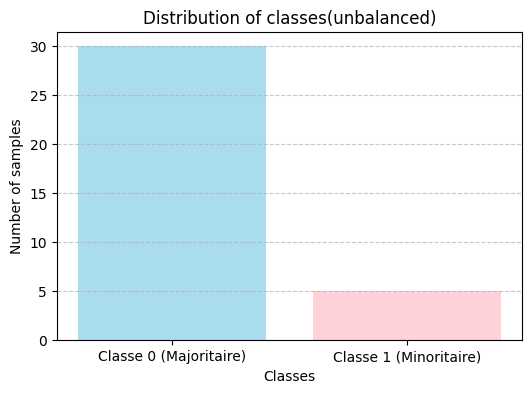

In [25]:
np.random.seed(42)
X_majority = np.random.normal(loc=[5, 5], scale=1.0, size=(30, 2))  
X_minority = np.random.normal(loc=[2, 2], scale=0.5, size=(5, 2))   

y_majority = [0] * len(X_majority)  
y_minority = [1] * len(X_minority) 

X_1 = np.vstack([X_majority, X_minority])
y_1 = np.array(y_majority + y_minority)

counts = Counter(y_1)

plt.figure(figsize=(6, 4))
plt.bar(counts.keys(), counts.values(), color=['skyblue', 'pink'], alpha=0.7)
plt.xticks([0, 1], labels=["Classe 0 (Majoritaire)", "Classe 1 (Minoritaire)"])
plt.title("Distribution of classes(unbalanced)")
plt.ylabel("Number of samples")
plt.xlabel("Classes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

2- Balancing using SMOTE (from Scratch)

In [26]:

from sklearn.neighbors import NearestNeighbors
import numpy as np
from collections import Counter

def custom_smote(X, y, minority_class, k=5, n_samples=None):
    # Extracting the X of the minority class
    X_minority = X[y == minority_class]
    ylength_minority = len(X_minority)

    if n_samples is None:
        n_samples = len(X[y != minority_class]) - ylength_minority

    nbrs = NearestNeighbors(n_neighbors=k).fit(X_minority)
    _, indices = nbrs.kneighbors(X_minority)

    synthetic_samples = []
    for _ in range(n_samples):
        i = np.random.randint(0, ylength_minority)
        neighbor = np.random.choice(indices[i])
        diff = X_minority[neighbor] - X_minority[i]
        synthetic_sample = X_minority[i] + np.random.rand() * diff
        synthetic_samples.append(synthetic_sample)

    synthetic_samples = np.array(synthetic_samples)
    X_resampled = np.vstack([X, synthetic_samples])
    y_resampled = np.hstack([y, [minority_class] * len(synthetic_samples)])

    return X_resampled, y_resampled

# indicate the minority class for balancing
minority_class = 1 if sum(y == 1) < sum(y == 0) else 0
X_resampled, y_resampled = custom_smote(X.values, y.values, minority_class)

print(Counter(y_resampled))



Counter({np.int64(1): 564, np.int64(0): 564})


Visualisation Dataset with Balancing

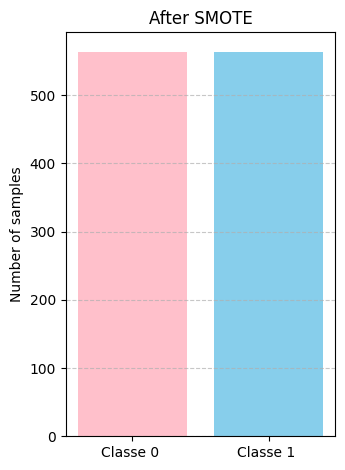

In [27]:
counts_after = Counter(y_resampled)

plt.subplot(1, 2, 2)
plt.bar(counts_after.keys(), counts_after.values(), color=['skyblue', 'pink'])
plt.xticks([0, 1], labels=["Classe 0 ", "Classe 1 "])
plt.title("After SMOTE")
plt.ylabel("Number of samples")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

2- Scaling Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
#Scaling the data using Standard Scaler for 0 mean and unit variance
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Saving The prepocessed Data in train and test CSV files 

In [29]:
#X_train_scaled and X_test_scaled are numpy arrays
#Extract the column names from the original dataframe
column_names = df.columns[:-1]
column_names

# # Combine scaled features and labels for training data
X_train_df = pd.DataFrame(X_train_scaled, columns=column_names)
y_train_df = pd.DataFrame(y_train, columns=["target"]) 
train_combined = pd.concat([X_train_df, y_train_df], axis=1)

# Combine scaled features and labels for test data
X_test_df = pd.DataFrame(X_test_scaled, columns=column_names)
y_test_df = pd.DataFrame(y_test, columns=["target"])
test_combined = pd.concat([X_test_df, y_test_df], axis=1)

# Save combined datasets to CSV
train_combined.to_csv("../data/processed/train_data.csv", index=False)
test_combined.to_csv("../data/processed/test_data.csv", index=False)